# AVCAD Final Project - Analysis of livestock activities: geographical patterns
### Created by: Maria Dolgaya (28168) and Mariana Coelho (25605)
### Professor Pedro Segurado
### MSc in Green Data Science, ISA, Portugal

GitHub Repository: https://github.com/marianadc01/avcad-livestock

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Import the datasets:
1. 'table_with_codes.xlsx' that contains all necessary information for the analysis except for the names of regions
2. 'Regions.xlsx' that contains the codes and the names of NUTS3 regions of Portugal (can be downloaded [here](https://smi.ine.pt/Categoria))

In [2]:
df = pd.read_excel('table_with_codes.xlsx')
df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,olive_area,vineyards_area,other_permanent_crop_area,fresh_fruit_holdings,citrus_holdings,fruit_holdings,nuts_holdings,olive_holdings,vineyard_holdings,other_permanent_crop_holdings
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,0,12,0,0,1,0,1,0,32,0
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,0,9,0,0,0,0,0,0,29,0
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,0,14,0,0,0,0,0,0,40,0
3,111160101,111,160101,Aboim das ChoÃ§as,1989,167,97,4,0,163,...,0,28,0,0,0,0,0,1,84,0
4,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,1,15,0,0,0,0,0,2,39,0


In [3]:
regions = pd.read_excel('Regions.xlsx')
regions.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,Fonte: www.ine.pt – Sistema de metainformação,NaN,NaN
3,NaN,Exportação de categorias - Data de extração: 1...,NaN,NaN
4,NaN,NaN,NaN,NaN


### Preparation of the datasets

Dataset 1:

In [4]:
# Drop all null values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Filter the dataset and leave the columns that are necessary for the project
df_filter = df.iloc[:, 0:29]
df_filter.head()

,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives,grassland_area,grassland_holdings
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,63,4,71,32,0,389,104,8,29,13
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,65,18,58,12,1,447,92,3,53,18
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,62,30,39,0,1,779,80,3,28,7
4,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,52,13,157,46,0,562,69,180,66,48
5,111160102,111,160102,AguiÃ£,2009,23,82,8,4,66,...,76,9,104,45,5,527,121,2,53,5


Dataset 2: 

In [5]:
# Drop the 1st column, the first 11 rows and use the new first row as headers

regions = regions.iloc[11:, 1:]
regions.reset_index(drop=True, inplace=True)
regions.columns = regions.iloc[0]
regions = regions[1:]
regions.head()

,Nivel,Code,Designation
1,1,PT,Portugal
2,2,1,Continente
3,3,11,Norte
4,4,111,Alto Minho
5,4,112,Cávado


Merge the main dataset with the regions, so it has a new column called 'Designation' - after that the dataset can be used for the analysis

In [6]:
df_merged = pd.merge(df_filter, regions[['Code', 'Designation']], left_on='code', right_on='Code', how='left')
df_merged.head()

,NutsID,code,DICOFRE,region_name,year,edu_none,edu_basic,edu_secondary,edu_superior,labour_family,...,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives,grassland_area,grassland_holdings,Code,Designation
0,111160101,111,160101,Aboim das ChoÃ§as,2019,15,61,11,7,34,...,71,32,0,389,104,8,29,13,111,Alto Minho
1,111160101,111,160101,Aboim das ChoÃ§as,2009,30,57,4,4,50,...,58,12,1,447,92,3,53,18,111,Alto Minho
2,111160101,111,160101,Aboim das ChoÃ§as,1999,49,73,7,6,62,...,39,0,1,779,80,3,28,7,111,Alto Minho
3,111160102,111,160102,AguiÃ£,2019,24,68,5,2,70,...,157,46,0,562,69,180,66,48,111,Alto Minho
4,111160102,111,160102,AguiÃ£,2009,23,82,8,4,66,...,104,45,5,527,121,2,53,5,111,Alto Minho


## 1. Explore how different types of livestock changes across the country

Check some summary statistics: 

In [7]:
# Filter the columns that contain data on livestock
livestock = df_merged.columns[19:27] 

# Basic summary statistics
df_livestock = df_merged[livestock]
df_livestock.describe()

,livestock_cattle,livestock_pigs,livestock_sheep,livestock_goats,livestock_equidae,livestock_poultry,livestock_rabbits,livestock_hives
count,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8.544000e+03,8544.000000,8544.000000
mean,426.382257,742.909527,853.810627,150.278675,21.272238,1.511776e+04,485.351241,137.214302
std,1168.609909,5031.522471,2260.333069,302.156875,38.099350,9.169048e+04,2355.777484,402.813556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,15.000000,7.000000,57.000000,9.000000,2.000000,2.980000e+02,34.000000,0.000000
50%,92.000000,27.000000,214.000000,42.000000,7.000000,6.900000e+02,120.000000,21.000000
75%,313.000000,112.000000,671.000000,154.250000,25.000000,1.648250e+03,294.000000,101.000000
max,27864.000000,218151.000000,38308.000000,4454.000000,994.000000,3.683132e+06,98557.000000,8019.000000


Exploratory data analysis: check normality 

H0: The livestock types are normally distributed


livestock_cattle: Statistics=0.360, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 600x400 with 0 Axes>

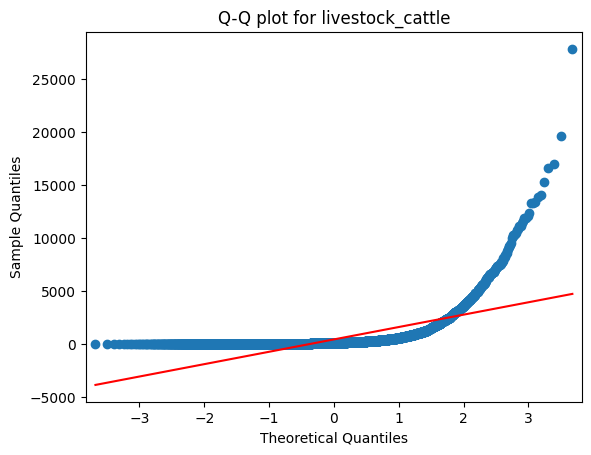

livestock_pigs: Statistics=0.116, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

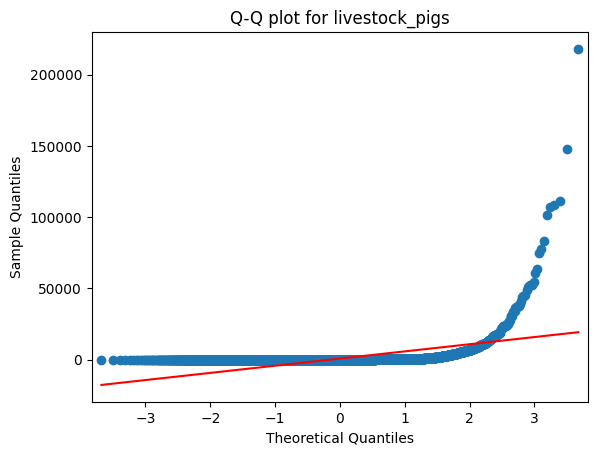

livestock_sheep: Statistics=0.363, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

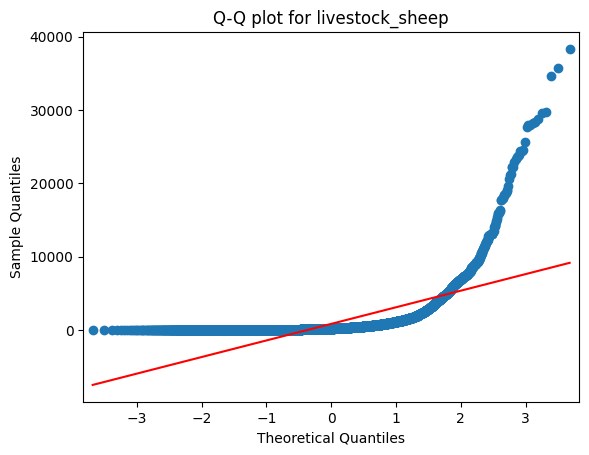

livestock_goats: Statistics=0.505, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

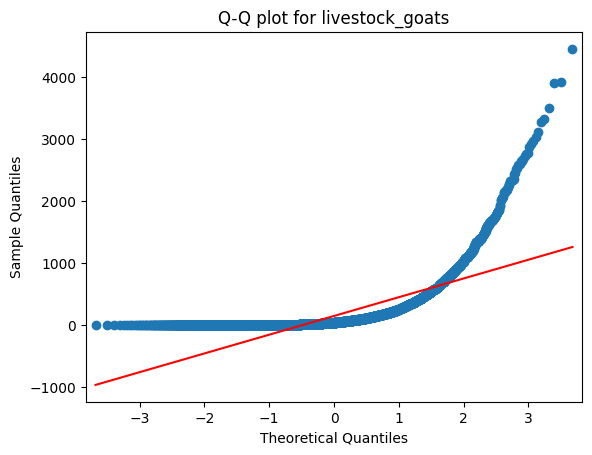

livestock_equidae: Statistics=0.546, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

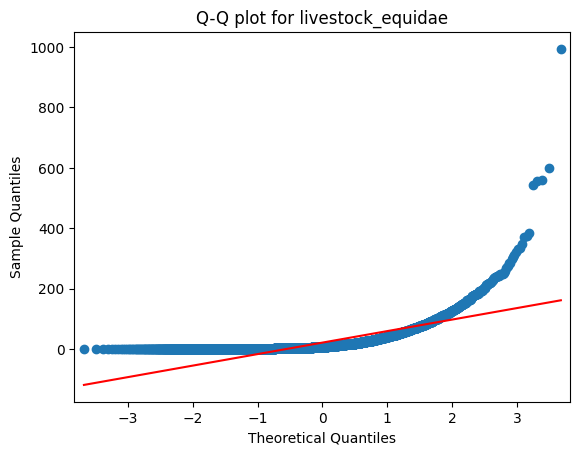

livestock_poultry: Statistics=0.138, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

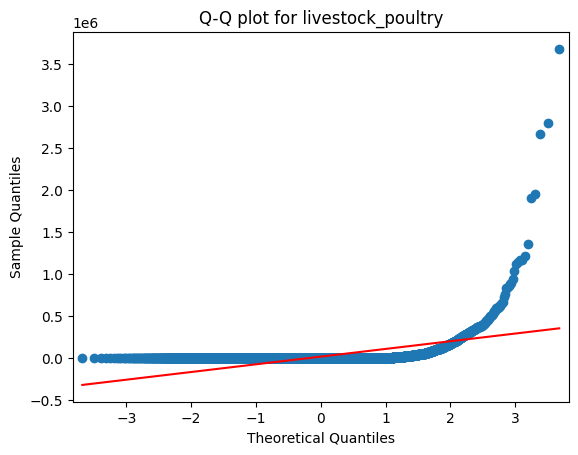

livestock_rabbits: Statistics=0.153, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

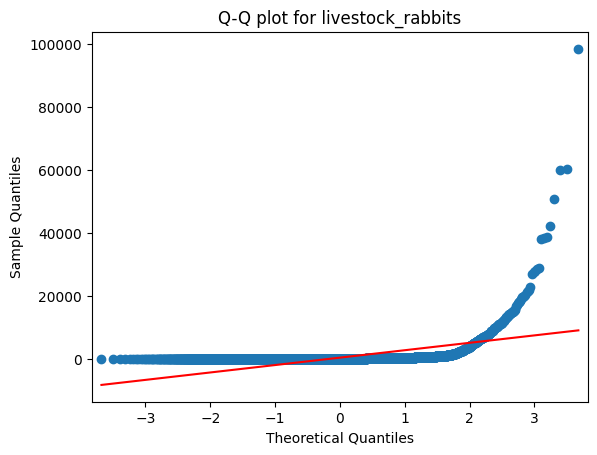

livestock_hives: Statistics=0.335, p=0.000
Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <0.05


<Figure size 600x400 with 0 Axes>

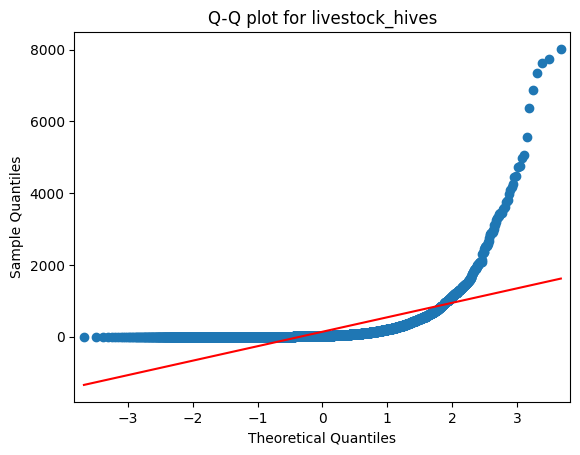

In [8]:
from scipy.stats import shapiro, anderson
import statsmodels.api as sm

for livestock in df_livestock:
    stat, p = shapiro(df_livestock[livestock])
    print(f'{livestock}: Statistics={stat:.3f}, p={p:.3f}')
    
    alpha = 0.05
    if p > alpha:
        print(f'Sample is not significantly different from Gaussian (fail to reject H0). Rejecting H0 has an error probability >{alpha}')
    else:
        print(f'Sample is significantly different from Gaussian (reject H0). Rejecting H0 has an error probability <{alpha}')
    
    # Q-Q plot
    plt.figure(figsize=(6, 4))
    sm.qqplot(df_livestock[livestock], line='s')
    plt.title(f'Q-Q plot for {livestock}')
    plt.show()

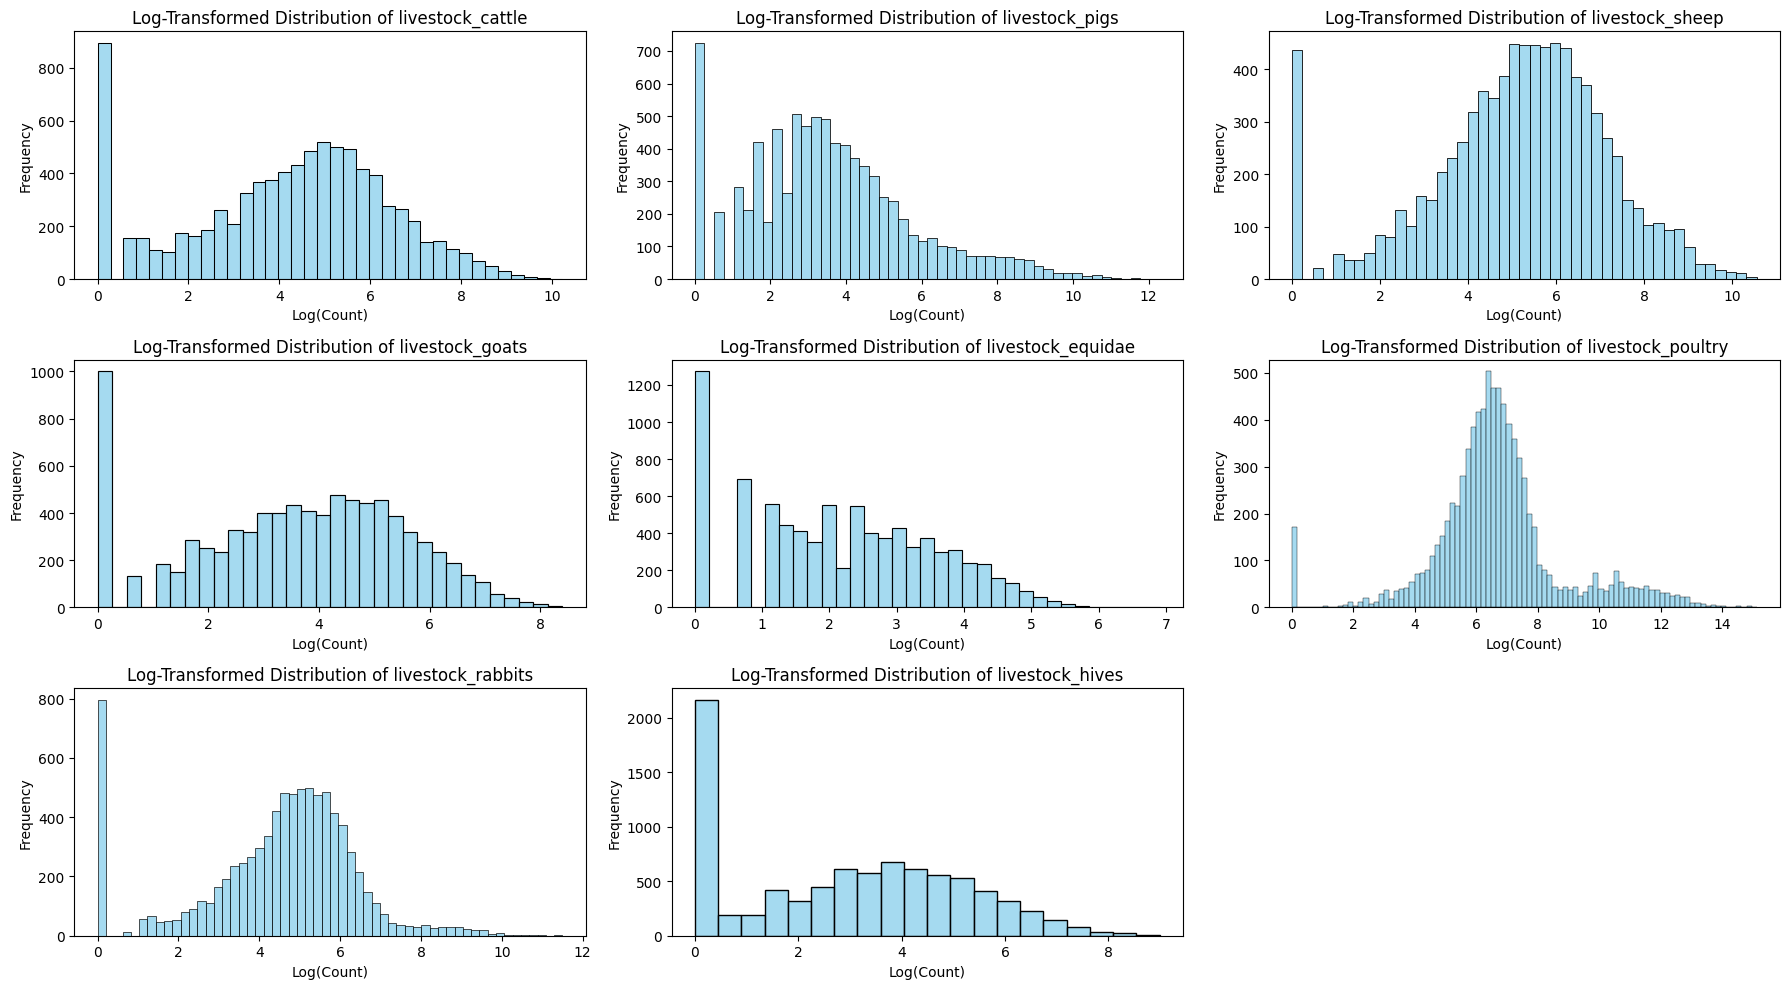

In [9]:
# Plot the distribution of each type of livestock performing transformation 
# log1p is used to handle zero values

df_transformed = df_livestock.copy()
for col in df_livestock:
    df_transformed[col] = np.log1p(df_merged[col]) 

plt.figure(figsize=(18, 10))

for i, livestock in enumerate(df_livestock):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_transformed[livestock], kde=False, color='skyblue')
    plt.title(f'Log-Transformed Distribution of {livestock}')
    plt.xlabel('Log(Count)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Summary: most of the livestock types are normally distributed if the '0' values are excluded from the analysis, with the exception of Equidae. The distributions of pigs and poultry are skewed.  

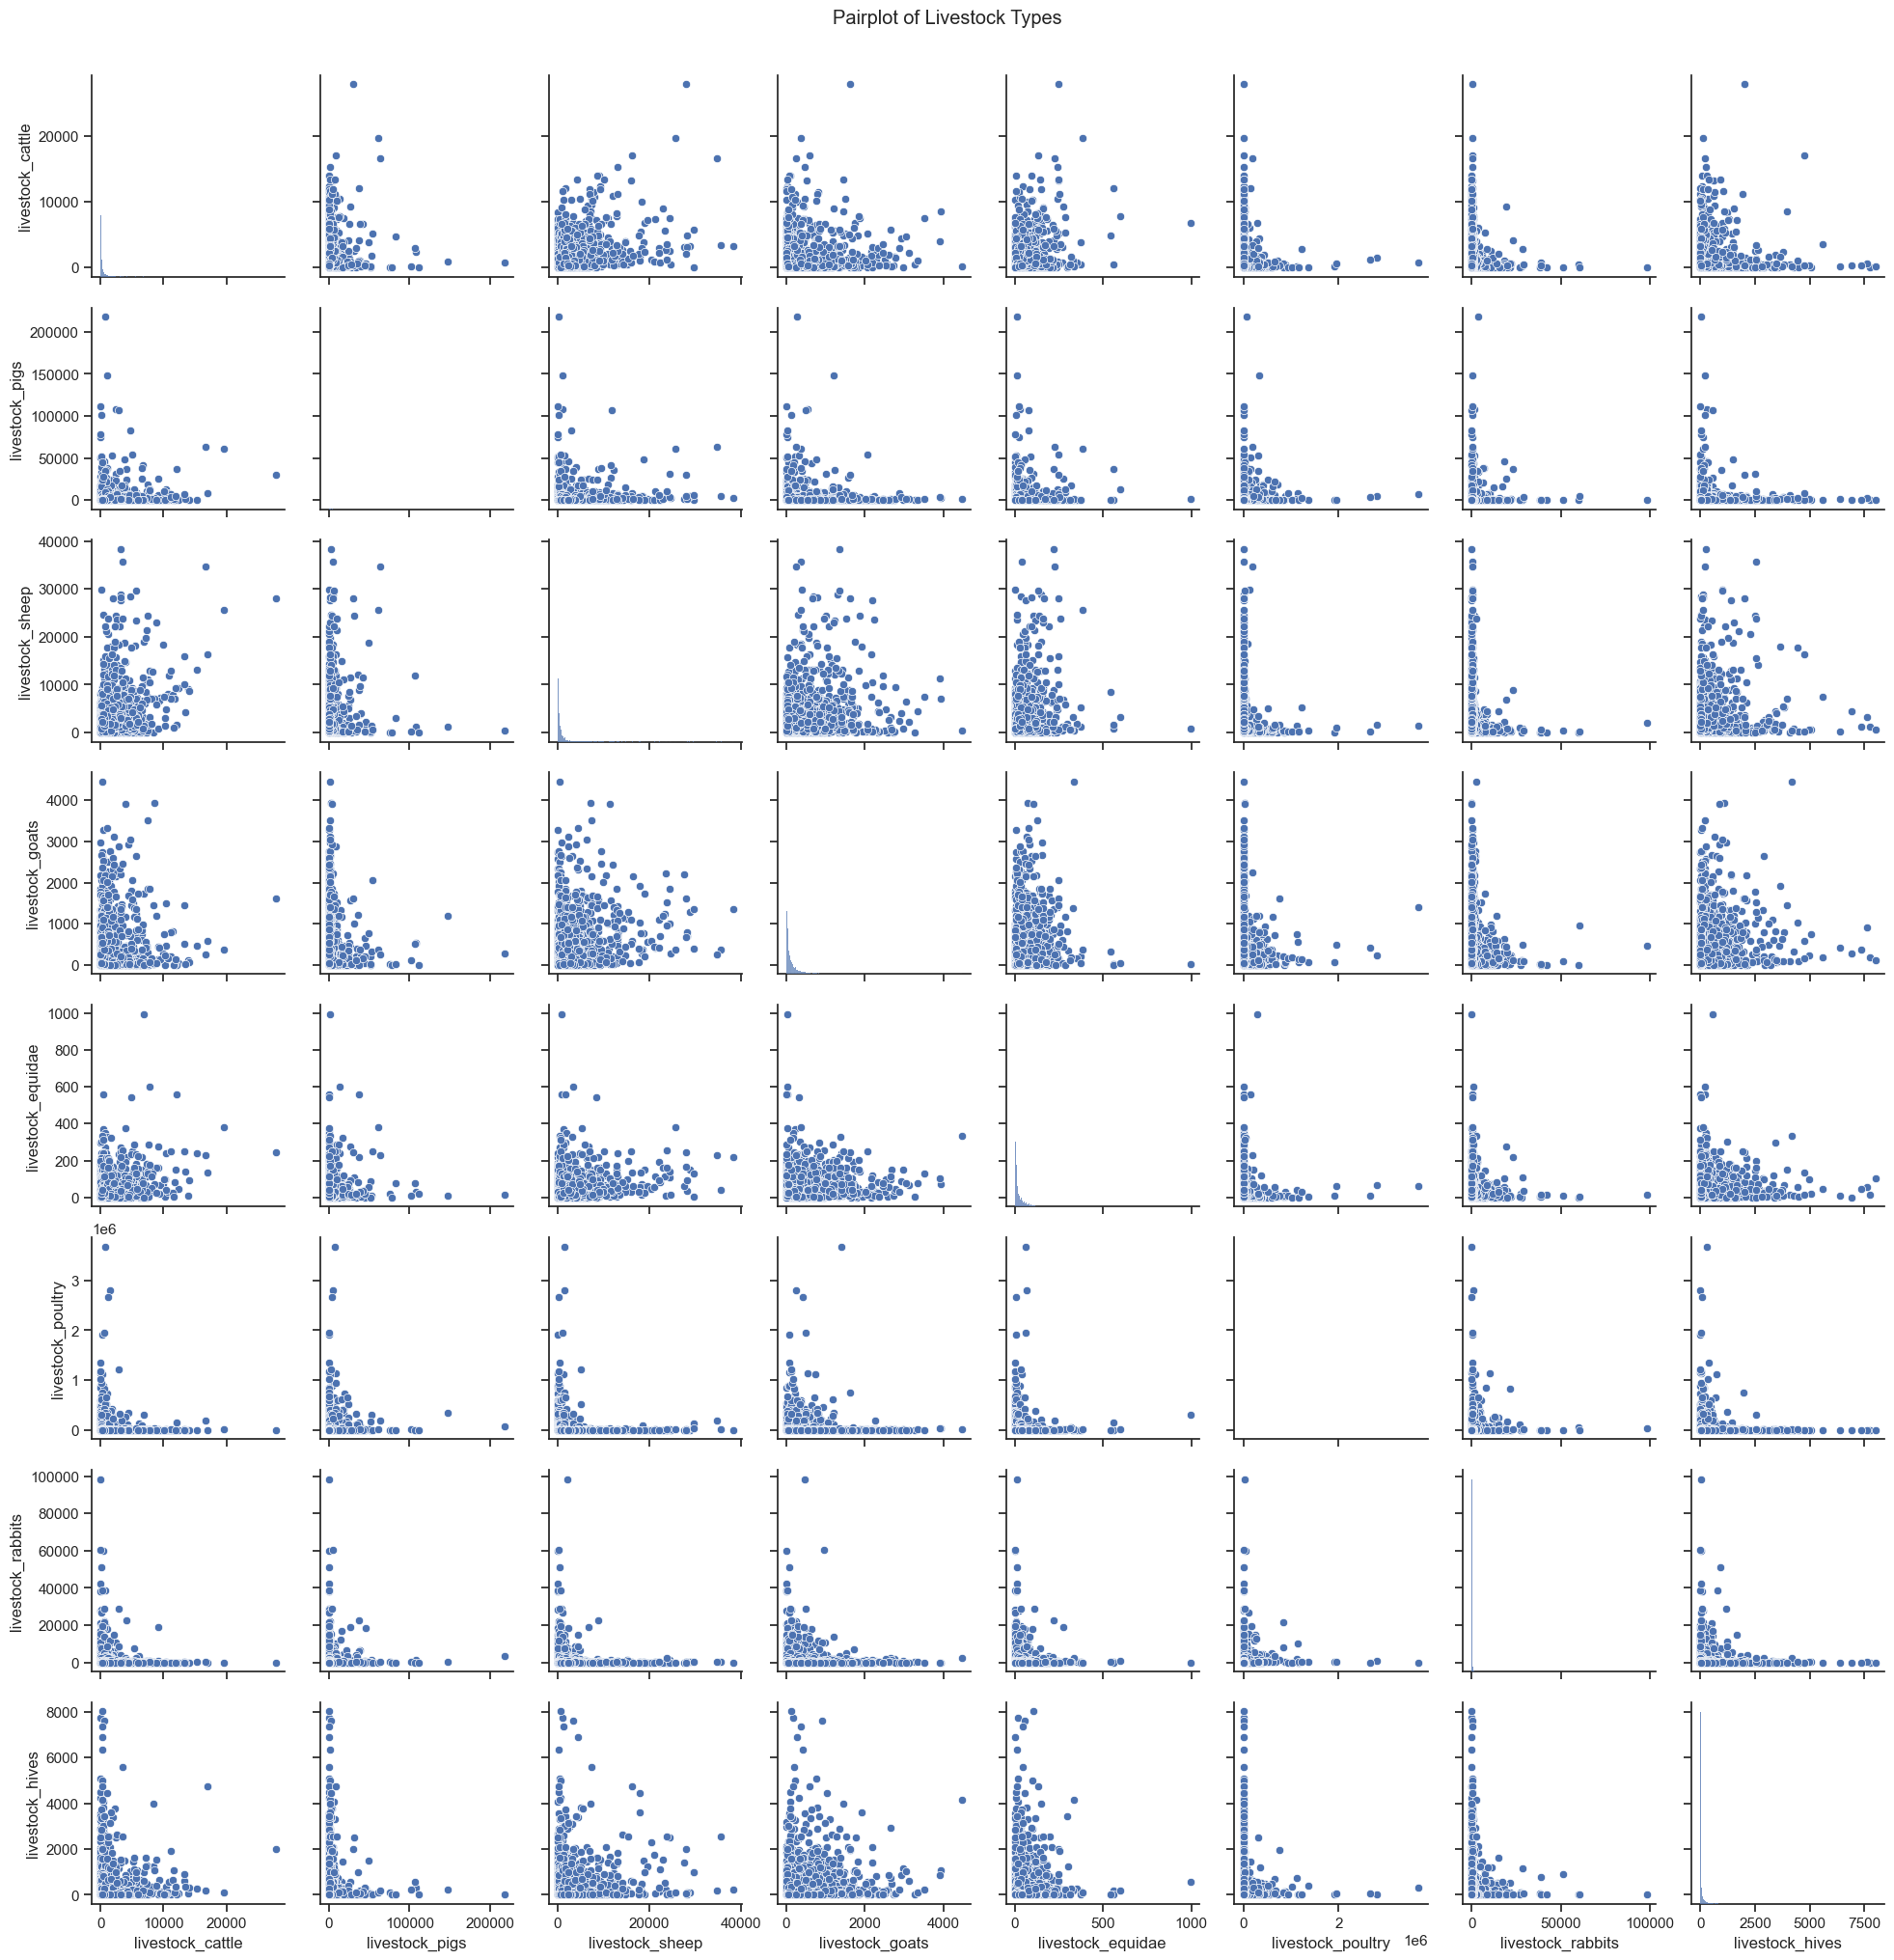

In [10]:
# Check if the types of livestock are correlated

sns.set(style="ticks")
pairplot = sns.pairplot(df_livestock)
pairplot.fig.suptitle("Pairplot of Livestock Types", y=1.02)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Summary: there is no correlation between different types of livestock.

In [11]:
# Transform the dataframe so it is suitable for the analysis

df_long = pd.melt(df_merged, id_vars=['year', 'Designation'], 
                  value_vars=['livestock_cattle', 'livestock_pigs', 'livestock_sheep', 'livestock_goats', 'livestock_equidae', 'livestock_poultry', 'livestock_rabbits', 'livestock_hives'], 
                  var_name='Livestock_Type', value_name='Population')
print(df_long.head())

   year Designation    Livestock_Type  Population
0  2019  Alto Minho  livestock_cattle          63
1  2009  Alto Minho  livestock_cattle          65
2  1999  Alto Minho  livestock_cattle          62
3  2019  Alto Minho  livestock_cattle          52
4  2009  Alto Minho  livestock_cattle          76


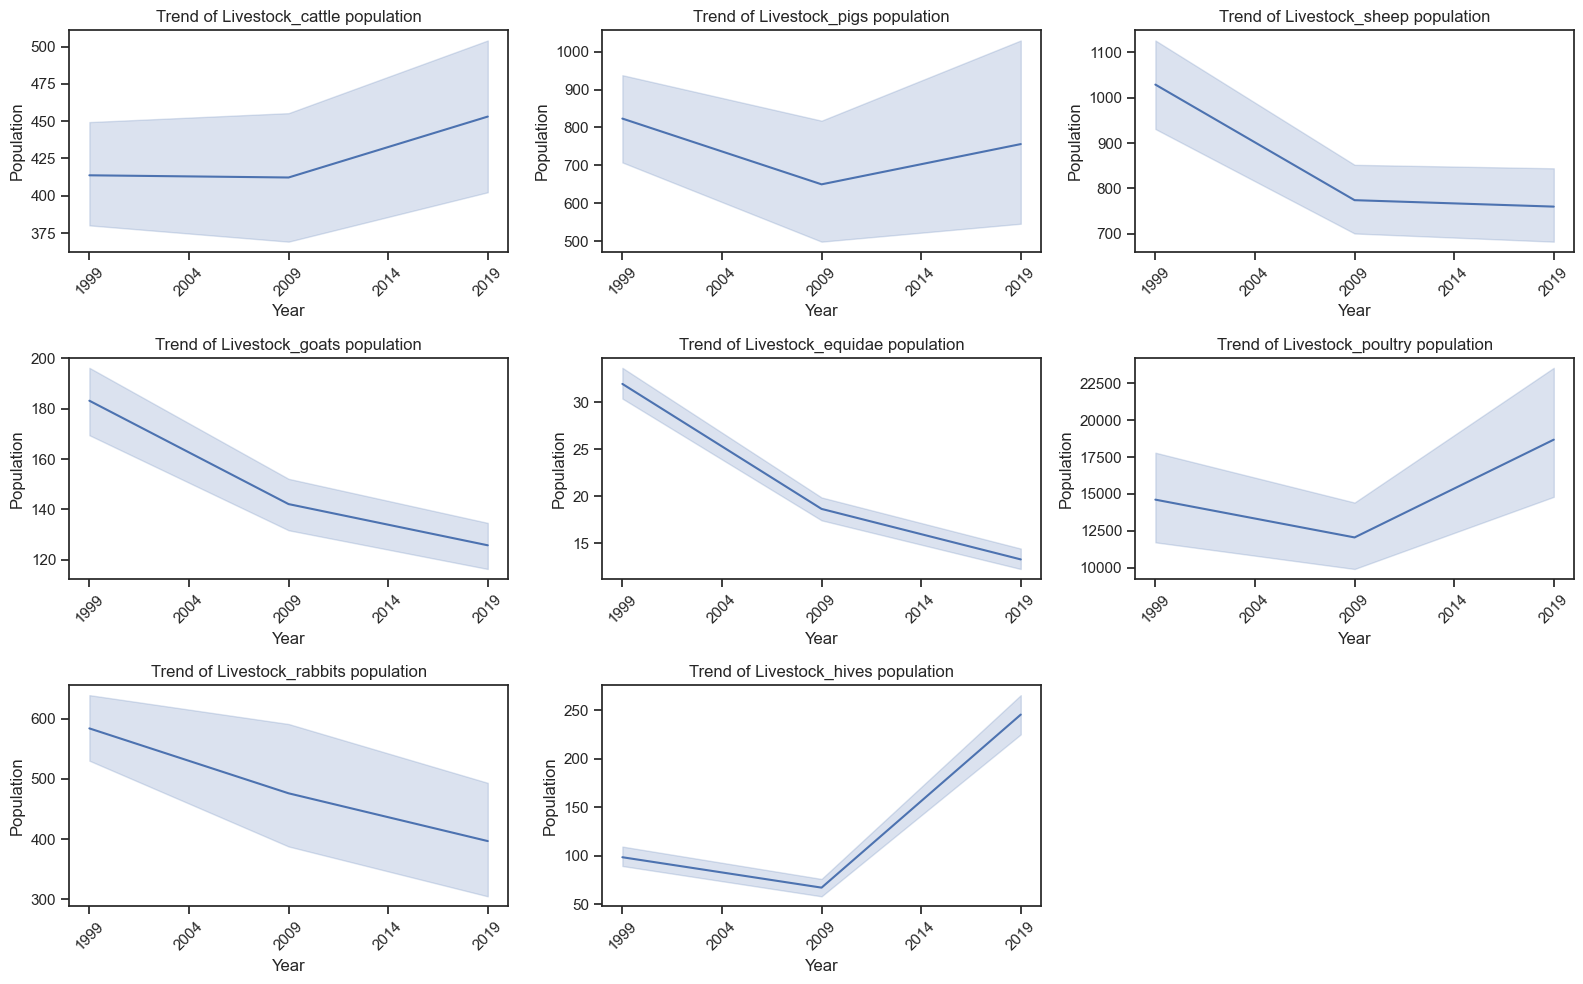

In [12]:
# Trend analysis: How has the livestock population changed over the years across different regions?

plt.figure(figsize=(16, 10))
livestock_types = df_long['Livestock_Type'].unique()

for i, livestock in enumerate(livestock_types, 1):
    plt.subplot(3, 3, i)
    subset = df_long[df_long['Livestock_Type'] == livestock]
    sns.lineplot(data=subset, x='year', y='Population')
    plt.title(f'Trend of {livestock.capitalize()} population')
    plt.xlabel('Year', fontsize=12)
    plt.xticks(range(min(subset['year']), max(subset['year'])+1, 5), rotation=45) 
    plt.ylabel('Population', fontsize=12)

plt.tight_layout()
plt.show()

Summary: the trend is different for different types of livestock - the populations of cattle and poultry have slightly decreased; goats, equidae, sheep and rabbits populations have decreased; hives have increased drastically.   

Inferential statistics:  

Null Hypothesis: There is no significant difference in livestock populations among different regions.


In [13]:
# Perform ANOVA test

from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols


anova_results = {}
for livestock in df_long['Livestock_Type'].unique():
    groups = [df_long['Population'][(df_long['Designation'] == region) & 
                                    (df_long['Livestock_Type'] == livestock)].values 
              for region in df_long['Designation'].unique()]
    stat, p = f_oneway(*groups)
    anova_results[livestock] = {'F-statistics': stat, 'p-value': p}

    print(f"\n{livestock.capitalize()}:")
    print('F-statistics=%.3f, p=%.6f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Fail to reject H0. Rejecting H0 has an error probability > 0.05')
    else:
        print('Reject H0 with an error probability < 0.05')


Livestock_cattle:
F-statistics=145.667, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_pigs:
F-statistics=36.247, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_sheep:
F-statistics=264.362, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_goats:
F-statistics=76.503, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_equidae:
F-statistics=64.335, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_poultry:
F-statistics=28.754, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_rabbits:
F-statistics=6.383, p=0.000000
Reject H0 with an error probability < 0.05

Livestock_hives:
F-statistics=71.189, p=0.000000
Reject H0 with an error probability < 0.05


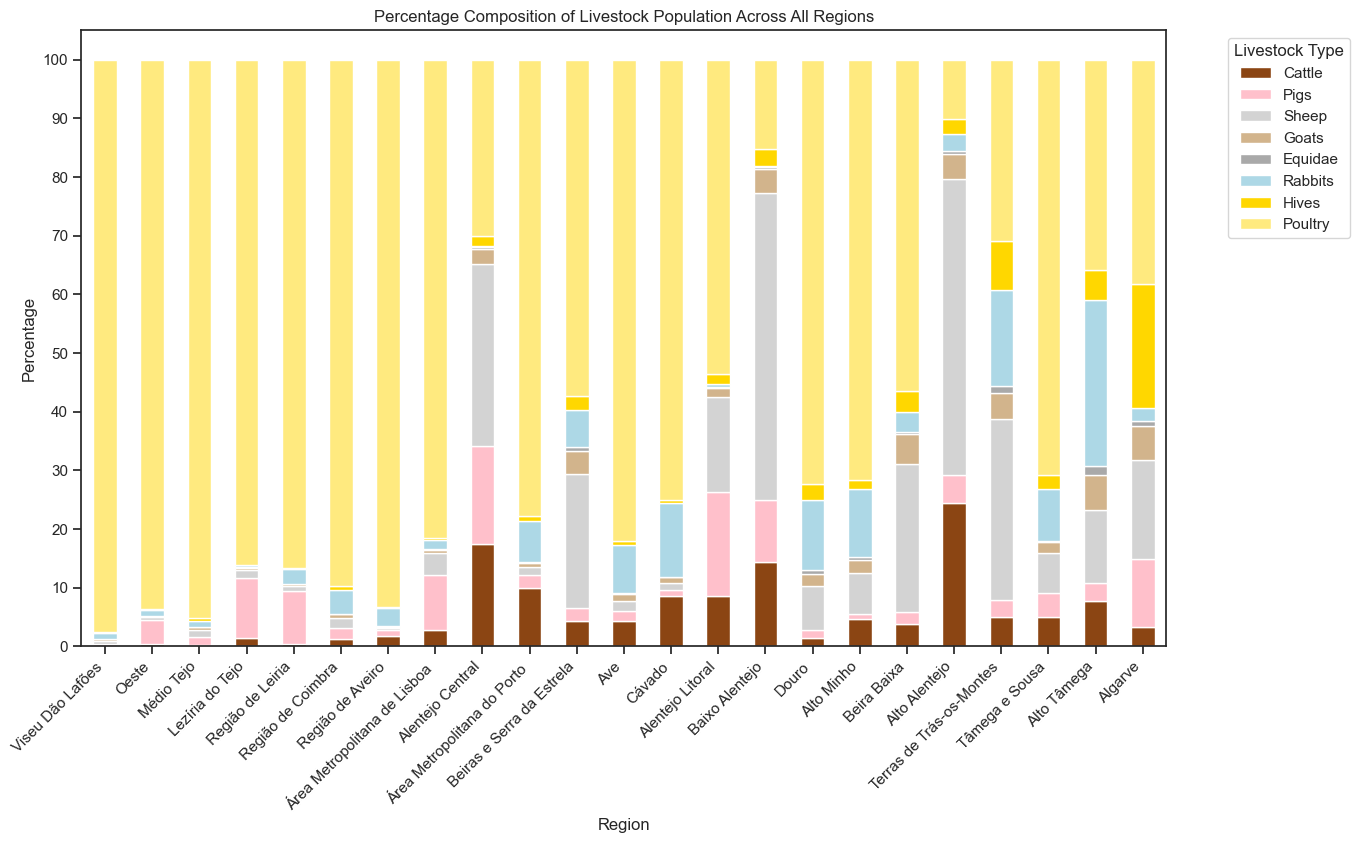

In [58]:
# Show the distribution of livestock types across the regions

livestock_columns = [
    'livestock_cattle', 'livestock_pigs', 'livestock_sheep', 
    'livestock_goats', 'livestock_equidae',
    'livestock_rabbits', 'livestock_hives', 'livestock_poultry'
]

df_grouped = df_merged.groupby('Designation')[livestock_columns].sum()

df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped_sorted = df_grouped.sort_values(by='Total', ascending=False)
df_grouped_sorted.drop(columns=['Total'], inplace=True)

df_grouped_percentage = df_grouped_sorted.div(df_grouped_sorted.sum(axis=1), axis=0) * 100

livestock_mapping = {
    'livestock_cattle': 'Cattle',
    'livestock_pigs': 'Pigs',
    'livestock_sheep': 'Sheep',
    'livestock_goats': 'Goats',
    'livestock_equidae': 'Equidae',
    'livestock_rabbits': 'Rabbits',
    'livestock_hives': 'Hives',
    'livestock_poultry': 'Poultry'
}

colors = {
    'livestock_cattle': '#8B4513', 
    'livestock_pigs': '#FFC0CB',   
    'livestock_sheep': '#D3D3D3',   
    'livestock_goats': '#D2B48C',   
    'livestock_equidae': '#A9A9A9', 
    'livestock_rabbits': '#ADD8E6', 
    'livestock_hives': '#FFD700',   
    'livestock_poultry': '#FFD70080'  
}

# Plot
ax = df_grouped_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=[colors[col] for col in df_grouped_percentage.columns])
plt.title('Percentage Composition of Livestock Population Across All Regions')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.legend(title='Livestock Type', bbox_to_anchor=(1.05, 1), loc='upper left', labels=[livestock_mapping[col] for col in df_grouped_percentage.columns])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(range(0, 101, 10))  
plt.show()

In [15]:
# Regional comparison: What regions have the highest and the lowest populations? 
# Find the region with the highest and lowest total livestock populations

highest_pop_reg = df_grouped['Total'].idxmax()
lowest_pop_reg = df_grouped['Total'].idxmin()

highest_pop = df_grouped.loc[highest_pop_reg, 'Total']
lowest_pop = df_grouped.loc[lowest_pop_reg, 'Total']

print(f"Region with highest population: {highest_pop_reg} ({highest_pop})")
print(f"Region with lowest population: {lowest_pop_reg} ({lowest_pop})")

Region with highest population: Viseu Dão Lafões (35733933)
Region with lowest population: Algarve (907604)


In [16]:
# Find the highest and lowest regions for each livestock type

highest_reg = df_grouped[livestock_columns].idxmax()
lowest_reg = df_grouped[livestock_columns].idxmin()

highest_values = df_grouped[livestock_columns].max()
lowest_values = df_grouped[livestock_columns].min()

print("\nRegions with highest populations for each livestock type:")
for livestock, region in highest_reg.items():
    print(f"{livestock}: {region} ({highest_values[livestock]})")

print("\nRegions with lowest populations for each livestock type:")
for livestock, region in lowest_reg.items():
    print(f"{livestock}: {region} ({lowest_values[livestock]})")


Regions with highest populations for each livestock type:
livestock_cattle: Alentejo Central (599391)
livestock_pigs: Lezíria do Tejo (1296775)
livestock_sheep: Baixo Alentejo (1312269)
livestock_goats: Beiras e Serra da Estrela (112451)
livestock_equidae: Terras de Trás-os-Montes (21562)
livestock_rabbits: Viseu Dão Lafões (368342)
livestock_hives: Algarve (191286)
livestock_poultry: Viseu Dão Lafões (34891500)

Regions with lowest populations for each livestock type:
livestock_cattle: Algarve (29468)
livestock_pigs: Alto Minho (18540)
livestock_sheep: Região de Aveiro (24855)
livestock_goats: Região de Aveiro (14281)
livestock_equidae: Área Metropolitana do Porto (2420)
livestock_rabbits: Baixo Alentejo (4153)
livestock_hives: Oeste (10963)
livestock_poultry: Alto Alentejo (176593)


Summary: we reject H0 - there is a significant difference between livestock types across different regions. 

For the final visualisation, the map of Portugal regions according to the NUTS3 level was downloaded from the [EUROSTAT webpage](https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics) in the GeoJSON format, the new dataset called "NUTS_RG_60M_2013_3035.geojson" was imported to the project and merged with the merged_data one that contains all data about the livestock. 

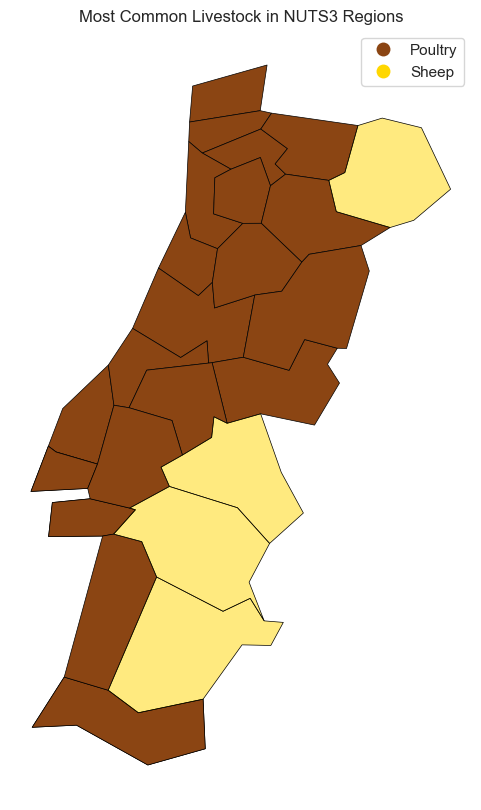

In [55]:
import matplotlib.font_manager
import geopandas as gpd

portugal_regions = gpd.read_file("NUTS_RG_60M_2013_3035.geojson")
merged_data = portugal_regions.merge(df_grouped, left_on='NUTS_NAME', right_index=True)
merged_data['Most_Common_Livestock'] = merged_data[livestock_columns].idxmax(axis=1)

cmap = mcolors.ListedColormap([colors[col] for col in livestock_columns])

merged_data['Most_Common_Livestock'] = merged_data['Most_Common_Livestock'].map(livestock_mapping)

fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='Most_Common_Livestock', ax=ax, legend=True, edgecolor='black', cmap=cmap, linewidth=0.5)
plt.title('Most Common Livestock in NUTS3 Regions')
ax.axis('off')
plt.show()

The final plot shows the most common livestock type of each region of Portugal: it is poultry for the majority of them and sheep for the eastern mountainous regions.